In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [2]:
#Sis=[ 0, 1, 2, 3, 4, 5,24,25,26,27,28,29,72,73,74,75,76, 77,90,91,92,93,94,95]
#Sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
#meas_RCU2L = [0, 1, 6, 7, 28, 29]
meas_RCU2L = [0, 1, 2,3,4,5,8,9,10,11]
Sis = [3*i+j for i in meas_RCU2L for j in range(3)]
sis=Sis

In [3]:
#fpath1='xst3_c10m'
fpath1='xst_mean'
fpath2='xst_mean'
files1=listdir(fpath1)#[f for f in listdir(fpath)];
files1.sort()
files1 = [f for f in files1 if isfile(join(fpath1,f))]
files2=listdir(fpath2)#[f for f in listdir(fpath)];
files2.sort()
files2 = [f for f in files2 if isfile(join(fpath2,f))]
print(len(files1),len(files2))
print(files1,files2)
#xst -> no calib
#xst2 -> step+delay, amp 
#xst3 -> all delay, no amp
#xst4 -> correct delay
#xst_t2 -> using t2 calibration

86 86
['xst_mean_2022-11-11-00.npz', 'xst_mean_2022-11-11-01.npz', 'xst_mean_2022-11-11-02.npz', 'xst_mean_2022-11-11-03.npz', 'xst_mean_2022-11-11-06.npz', 'xst_mean_2022-11-11-07.npz', 'xst_mean_2022-11-11-08.npz', 'xst_mean_2022-11-11-09.npz', 'xst_mean_2022-11-11-10.npz', 'xst_mean_2022-11-11-11.npz', 'xst_mean_2022-11-11-14.npz', 'xst_mean_2022-11-11-15.npz', 'xst_mean_2022-11-11-16.npz', 'xst_mean_2022-11-11-17.npz', 'xst_mean_2022-11-11-18.npz', 'xst_mean_2022-11-11-19.npz', 'xst_mean_2022-11-11-22.npz', 'xst_mean_2022-11-11-23.npz', 'xst_mean_2022-11-12-00.npz', 'xst_mean_2022-11-12-01.npz', 'xst_mean_2022-11-12-02.npz', 'xst_mean_2022-11-12-03.npz', 'xst_mean_2022-11-12-04.npz', 'xst_mean_2022-11-12-07.npz', 'xst_mean_2022-11-12-08.npz', 'xst_mean_2022-11-12-09.npz', 'xst_mean_2022-11-12-10.npz', 'xst_mean_2022-11-12-11.npz', 'xst_mean_2022-11-12-12.npz', 'xst_mean_2022-11-12-15.npz', 'xst_mean_2022-11-12-16.npz', 'xst_mean_2022-11-12-17.npz', 'xst_mean_2022-11-12-18.npz', 'xs

In [4]:
D1=[]
Cnt1=[]
#for fn in files1[34+3:35+3]:
#for fn in files1[3:4]:
for fn in files1[1:2]:
    print(fn)
    Dx=np.load(fpath1+"/"+fn)
    D1.append(Dx['xst'])
    Cnt1.append(Dx['cnt'])
#    dates.append(fn.split('.')[0][9:])
D1=np.array(D1)
Cnt1=np.array(Cnt1)
print(D1.shape,Cnt1.shape)
print(Cnt1[:,10])

xst_mean_2022-11-11-01.npz
(1, 512, 30, 30) (1, 512)
[8]


In [5]:
D1b=np.sum(D1[:,:]*Cnt1[:,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt1[:,:],axis=0)[:,np.newaxis,np.newaxis]

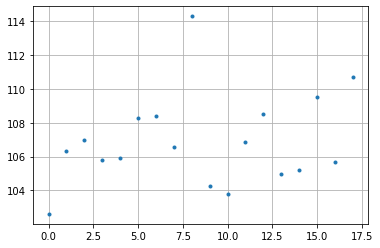

In [6]:
pwr1=[P2dB(np.sum(D1b[:,i,i])+1) for i in range(18)]
plt.plot(pwr1,'.')
plt.grid()

In [7]:
sis=np.array(range(len(pwr1)))
#sis=sis.compress((np.array(pwr)>10)*(np.array(pwr)<120))
#sis=[0,1,2,3,4,5]
print(sis)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [8]:
Calibration_Delay_Samples=np.array([28, 28, 28, 28,  0, 53,  0,  0,  0])
Xdelay_ns=np.array([-0.21742542424405414, 0.16849953974903842, 0.41691386427692667, 0.045250722692383546
                   , 1.0819575757683113, 3.4374682860351626, 1.649450213613255, 0.0, 1.0620442804283778])
XA0_deg=np.array([-6.739107700896103, -5.182952095443907, -2.9484237370580857, -7.930752211984503
                 ,8.818725028398184, 5.110917690950357, 11.442125900393675, 0.0, 10.188611173860775])
Ydelay_ns=np.array([-0.20198252333670347, -0.2048249983726559, -0.15597196344854938, -0.269245506482899
                   , 1.5223411486453777, 3.497718540942195, 1.0401019713185837, 0.0, 1.3570991359285711])
YA0_deg=np.array([-2.7982452501851562, -6.713126346851281, -6.411574520053744, -6.960684194999342
                 ,8.563391445153023, 3.0575057304270143, 5.202628526121119, 0.0, 8.60787794673235])


In [9]:
#sis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
sis=[0,1,2,3,4,5,7,6,8,9,10,11,12,13,14,15,16,17]
#               0  1   2   3   4   5   6   7   8
LBAs=np.array([16, 33, 34, 36, 72, 77, 82, 83, 94])
pair1=[3,6]


In [10]:
freq = [(n*100)/512 for n in range(512)]

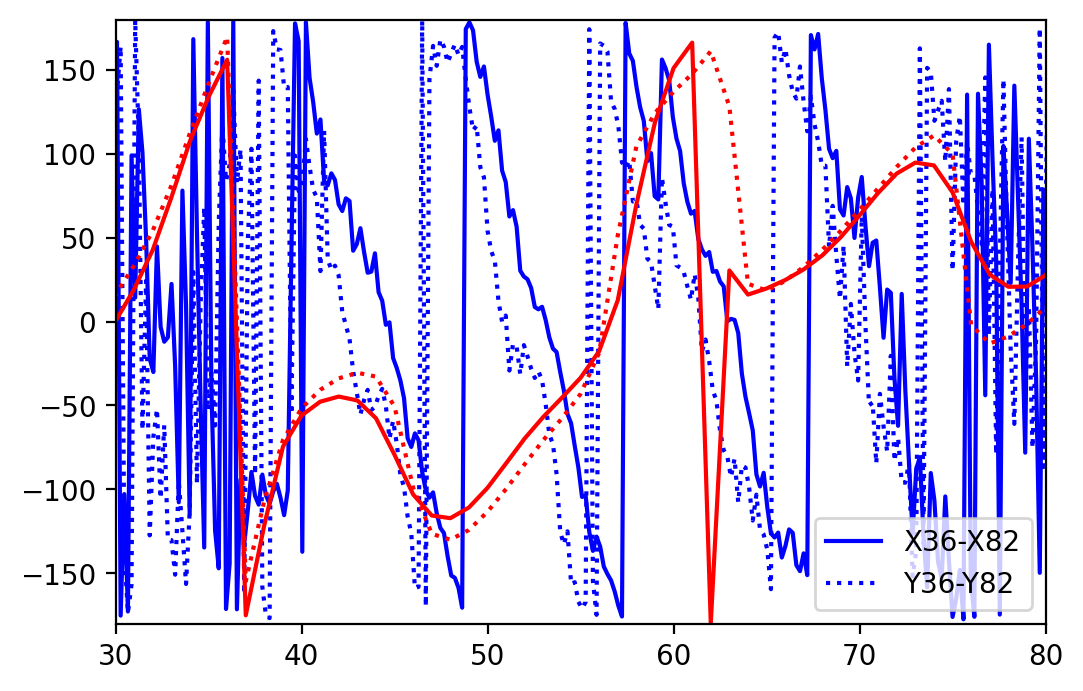

In [11]:
plt.figure(dpi=200)
ph=(np.angle(D1b[:,2*pair1[1],2*pair1[0]]))/np.pi*180
#ph-=np.round(ph[256]/360)*360+360
plt.plot(freq,ph,'b',label='X%i-X%i'%(LBAs[pair1[0]],LBAs[pair1[1]]))

ph=(np.angle(D1b[:,2*pair1[1]+1,2*pair1[0]+1]))/np.pi*180
#ph-=np.round(ph[256]/360)*360+360
plt.plot(freq,ph,'b:',label='Y%i-Y%i'%(LBAs[pair1[0]],LBAs[pair1[1]]))

Dsim=np.load("../L2TS_cal/SkyFreq_vis2022-11-04-16-00-00.npz")
Fsim=Dsim['freq']
vis=Dsim['vis']
plt.plot(Fsim,((np.angle(vis[:,1,0,0])))/np.pi*180,'r-');
plt.plot(Fsim,((np.angle(vis[:,1,0,1])))/np.pi*180,'r:');
#plt.plot(Fsim,((np.angle(vis[:,2,0,0])))/np.pi*180,'b-');
#plt.plot(Fsim,((np.angle(vis[:,2,0,1])))/np.pi*180,'b:');

plt.xlim(30,80)
plt.ylim(-180,180)
plt.legend()

[[1, 6, 2, 8], [1, 2, 6, 8]]


Text(0.5, 0, 'Frequency (MHz)')

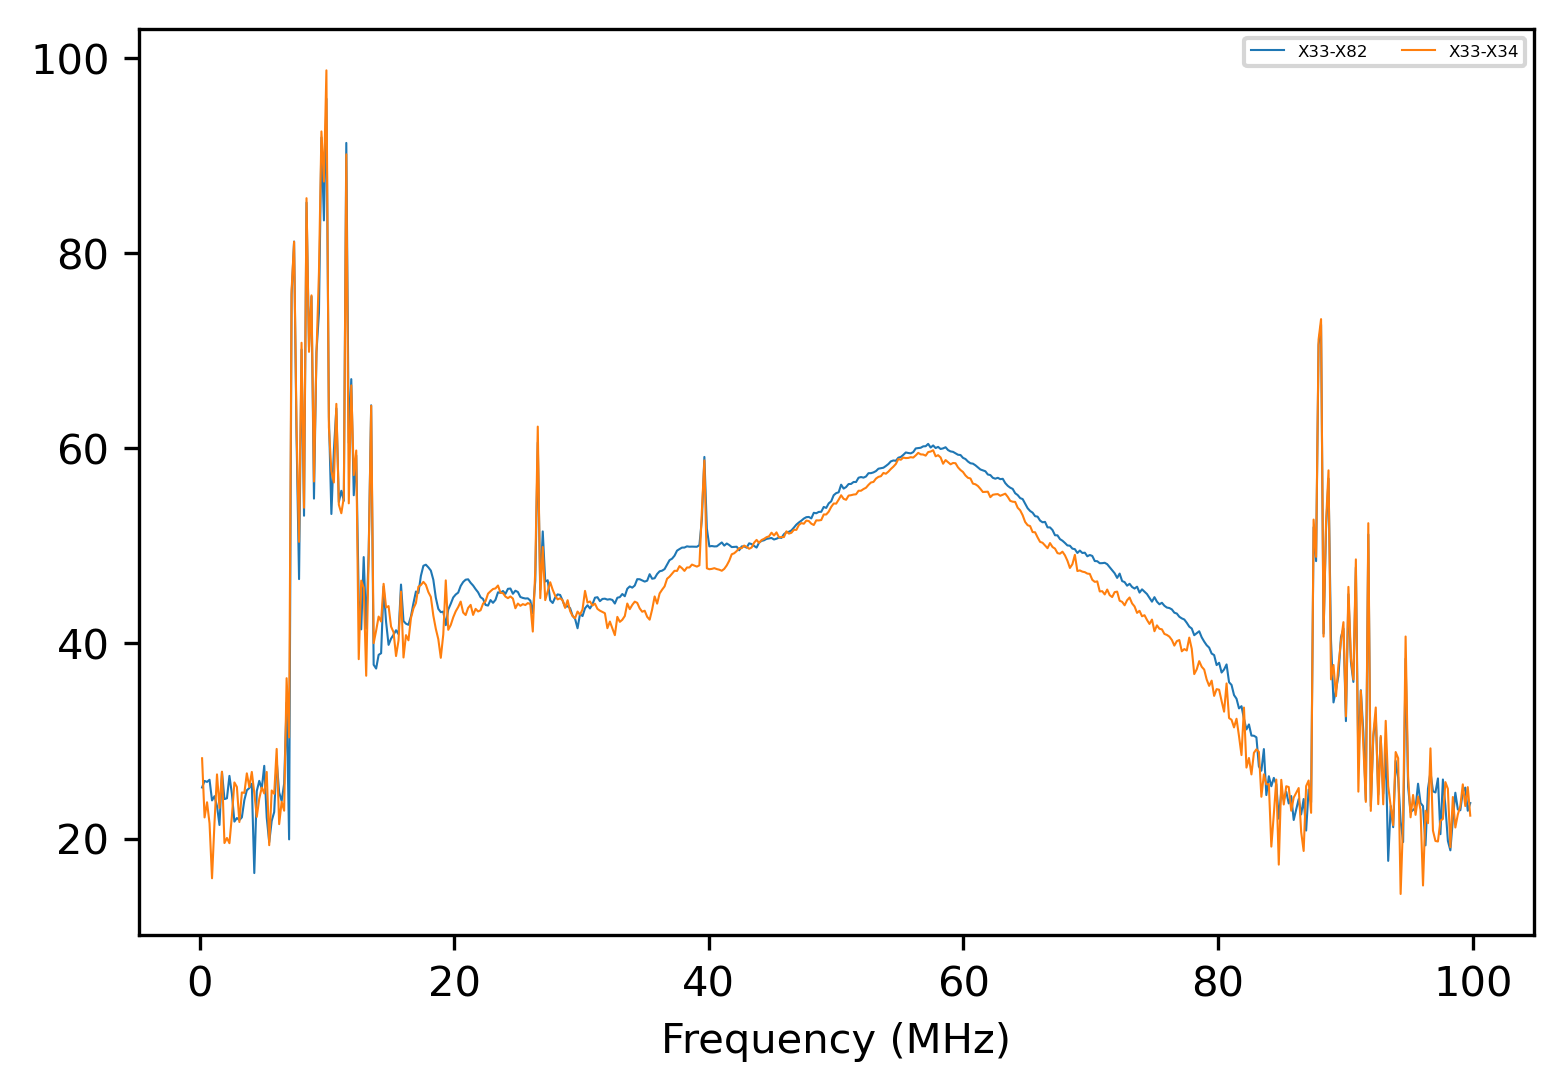

In [12]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
pairs=[[1,6,2,8],[1,2,6,8]] #33-82 / 34-94, 33-34, 82-94
#pairs=[[x,x+2] for i,x in enumerate(sis[:-2])]
#pairs=[[sis[x],sis[x+2]] for x in range(16)]
#pairs=[[x,y] for i,x in enumerate(sis) for y in sis[i+1:i+2]]
print(pairs)

for i,[p1,p2,p3,p4] in enumerate(pairs[:]):
    i1=p1*2 #Xpol
    i2=p2*2
    plt.plot(freq[1:],P2dB(np.roll(D1b[:,i2,i1],-0)+1e-6)[1:],'-',label='X%i-X%i'%(LBAs[p1],LBAs[p2]),linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)

plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
#plt.ylim(10,90)
plt.xlabel("Frequency (MHz)")

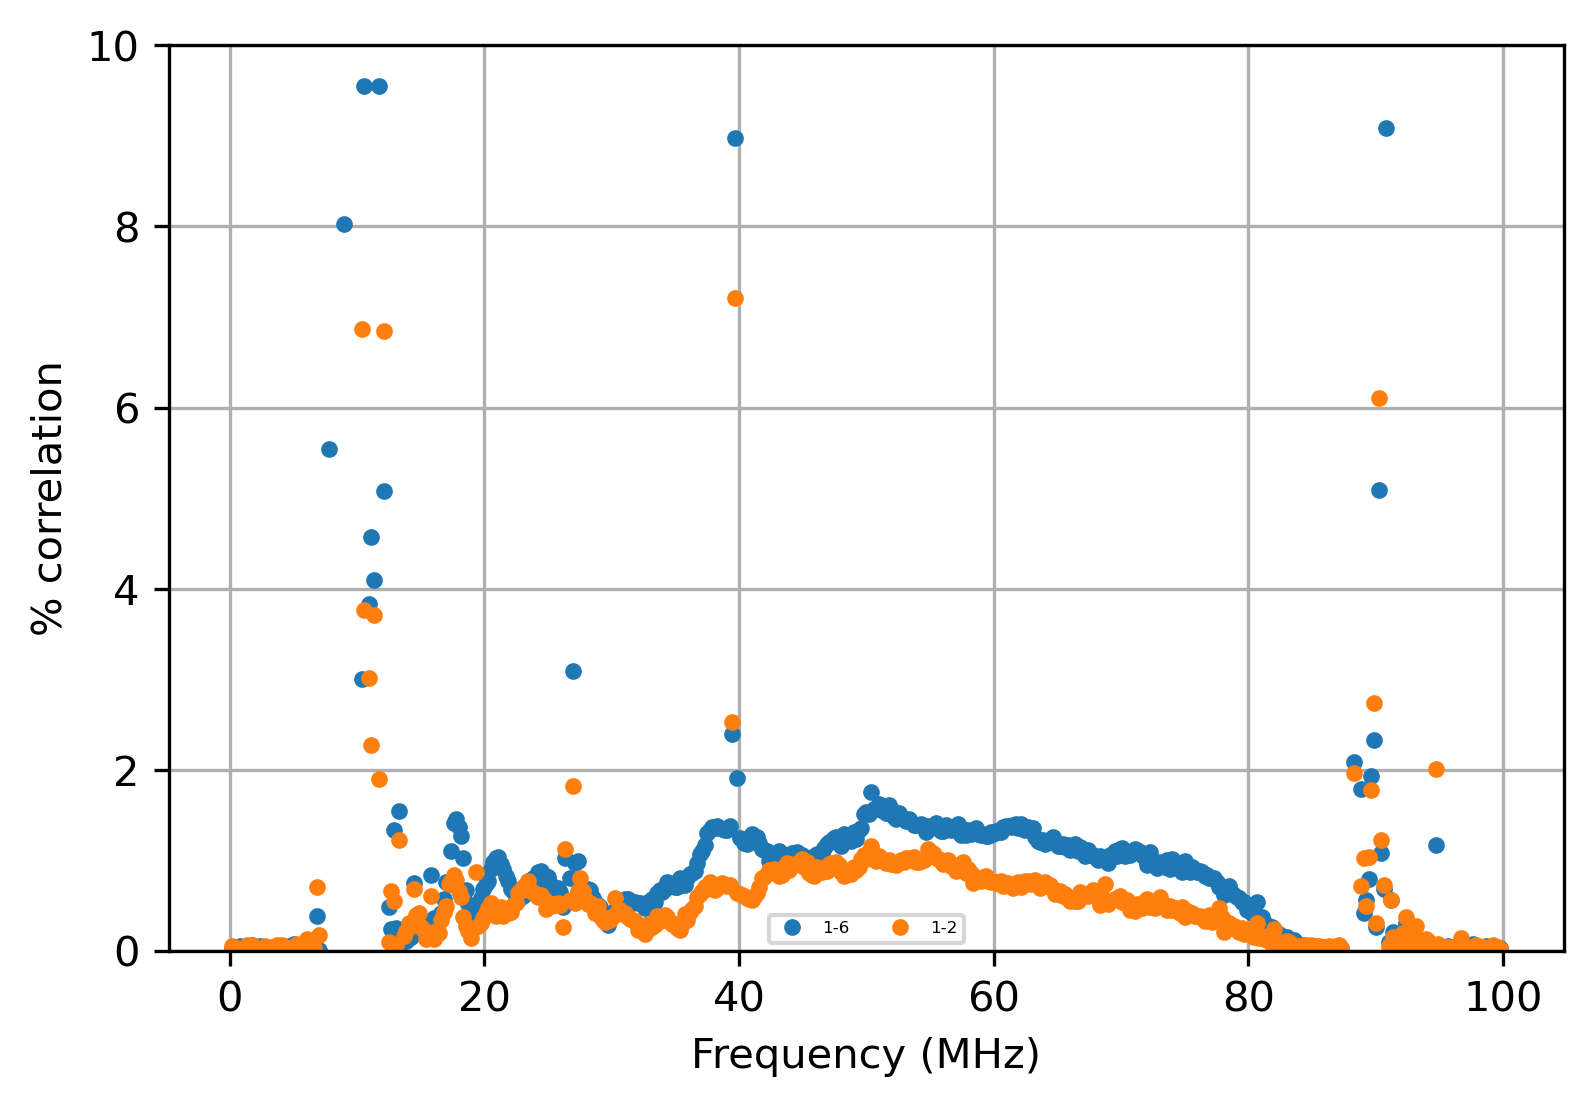

In [13]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2,p3,p4] in enumerate(pairs[:]):
    i1=p1*2
    i2=p2*2
    plt.plot(freq[1:],100*np.abs(np.roll(D1b[:,i2,i1]/np.sqrt(D1b[:,i2,i2]*D1b[:,i1,i1]),-0)+1e-6)[1:],'.',label='%i-%i'%(Sis[p1],Sis[p2]),linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
plt.ylim(-1,120)
plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
plt.ylim(0,10)
plt.xlabel("Frequency (MHz)")
plt.ylabel("% correlation");plt.grid()

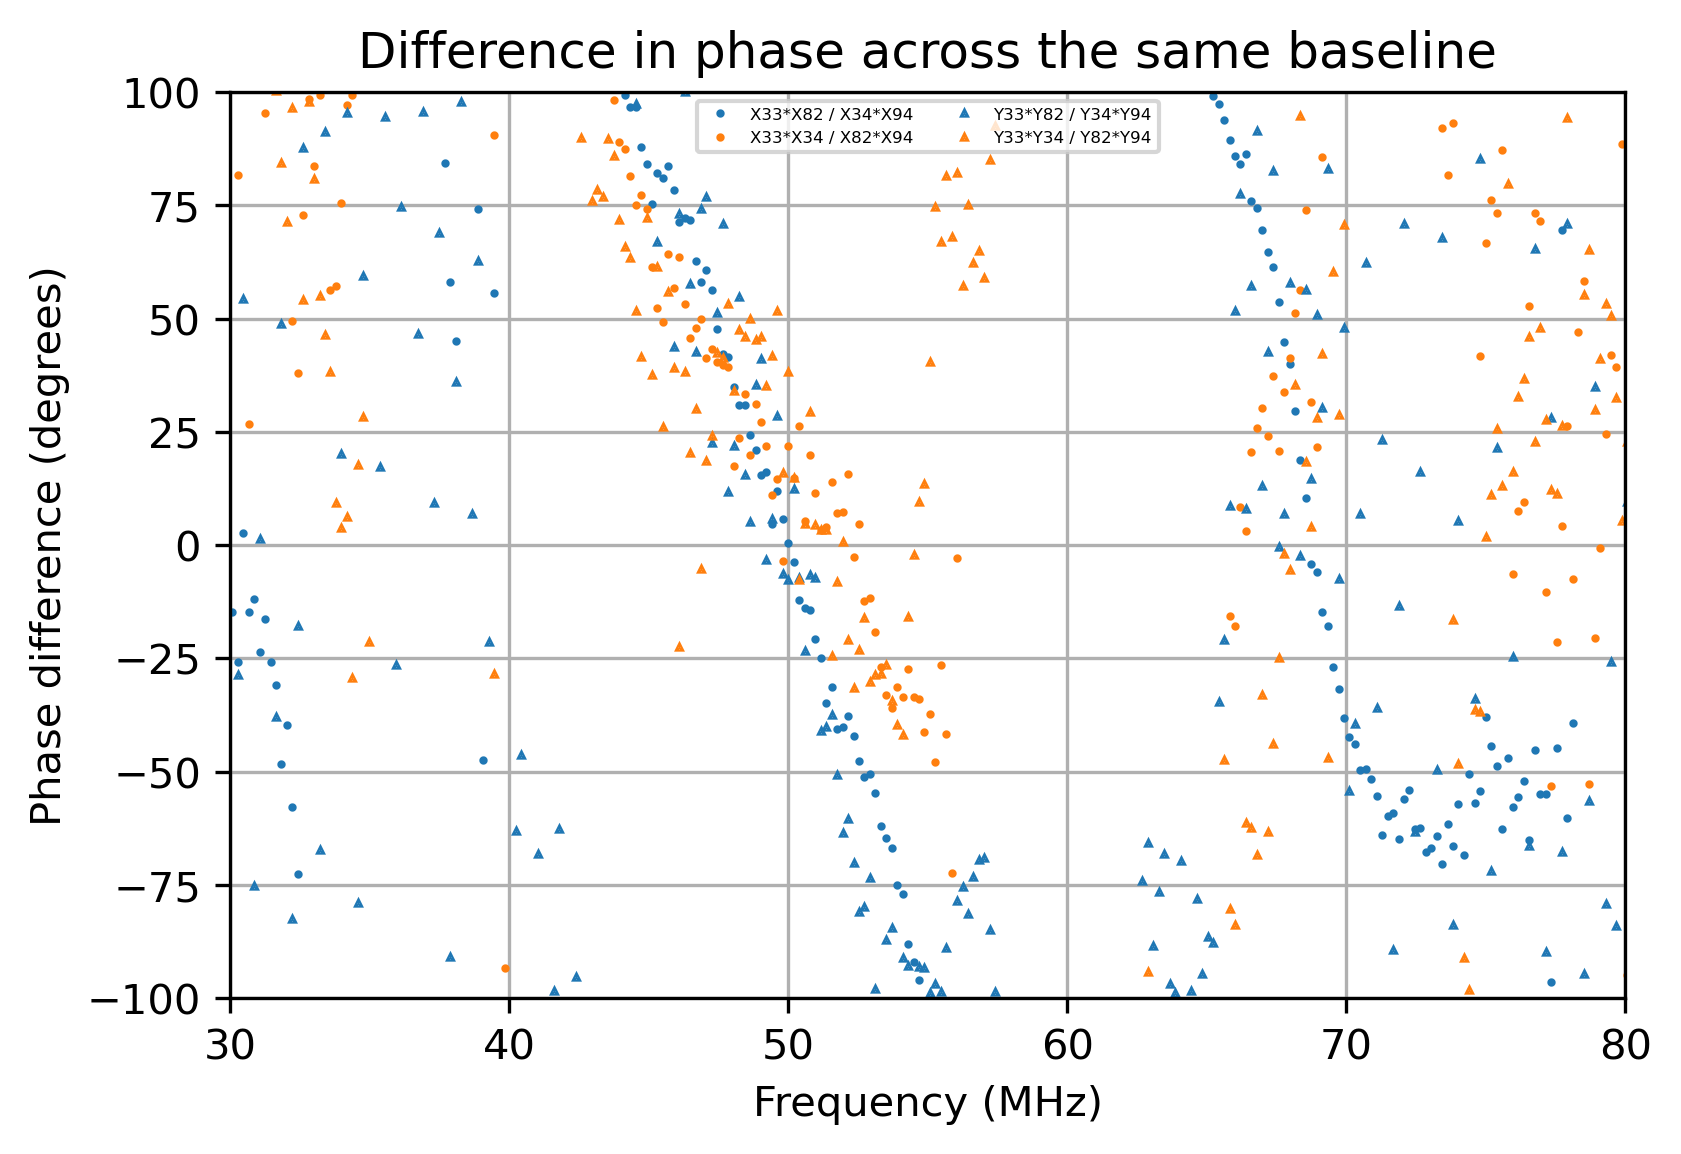

In [14]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2,p1*2]#*(corrX[p1]/corrX[p2])
    corr2=D1b[:,p4*2,p3*2]#*(corrX[p3]/corrX[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'.',label='X%i*X%i / X%i*X%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=2)
plt.gca().set_prop_cycle(None)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2+1,p1*2+1]#*(corrY[p1]/corrY[p2])
    corr2=D1b[:,p4*2+1,p3*2+1]#*(corrY[p3]/corrY[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'^',label='Y%i*Y%i / Y%i*Y%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=1)

plt.legend(fontsize=4,ncol=2)
plt.ylim(-100,100)
plt.xlim(30,80)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase difference (degrees)")
plt.title('Difference in phase across the same baseline')
plt.grid()

(9, 512)


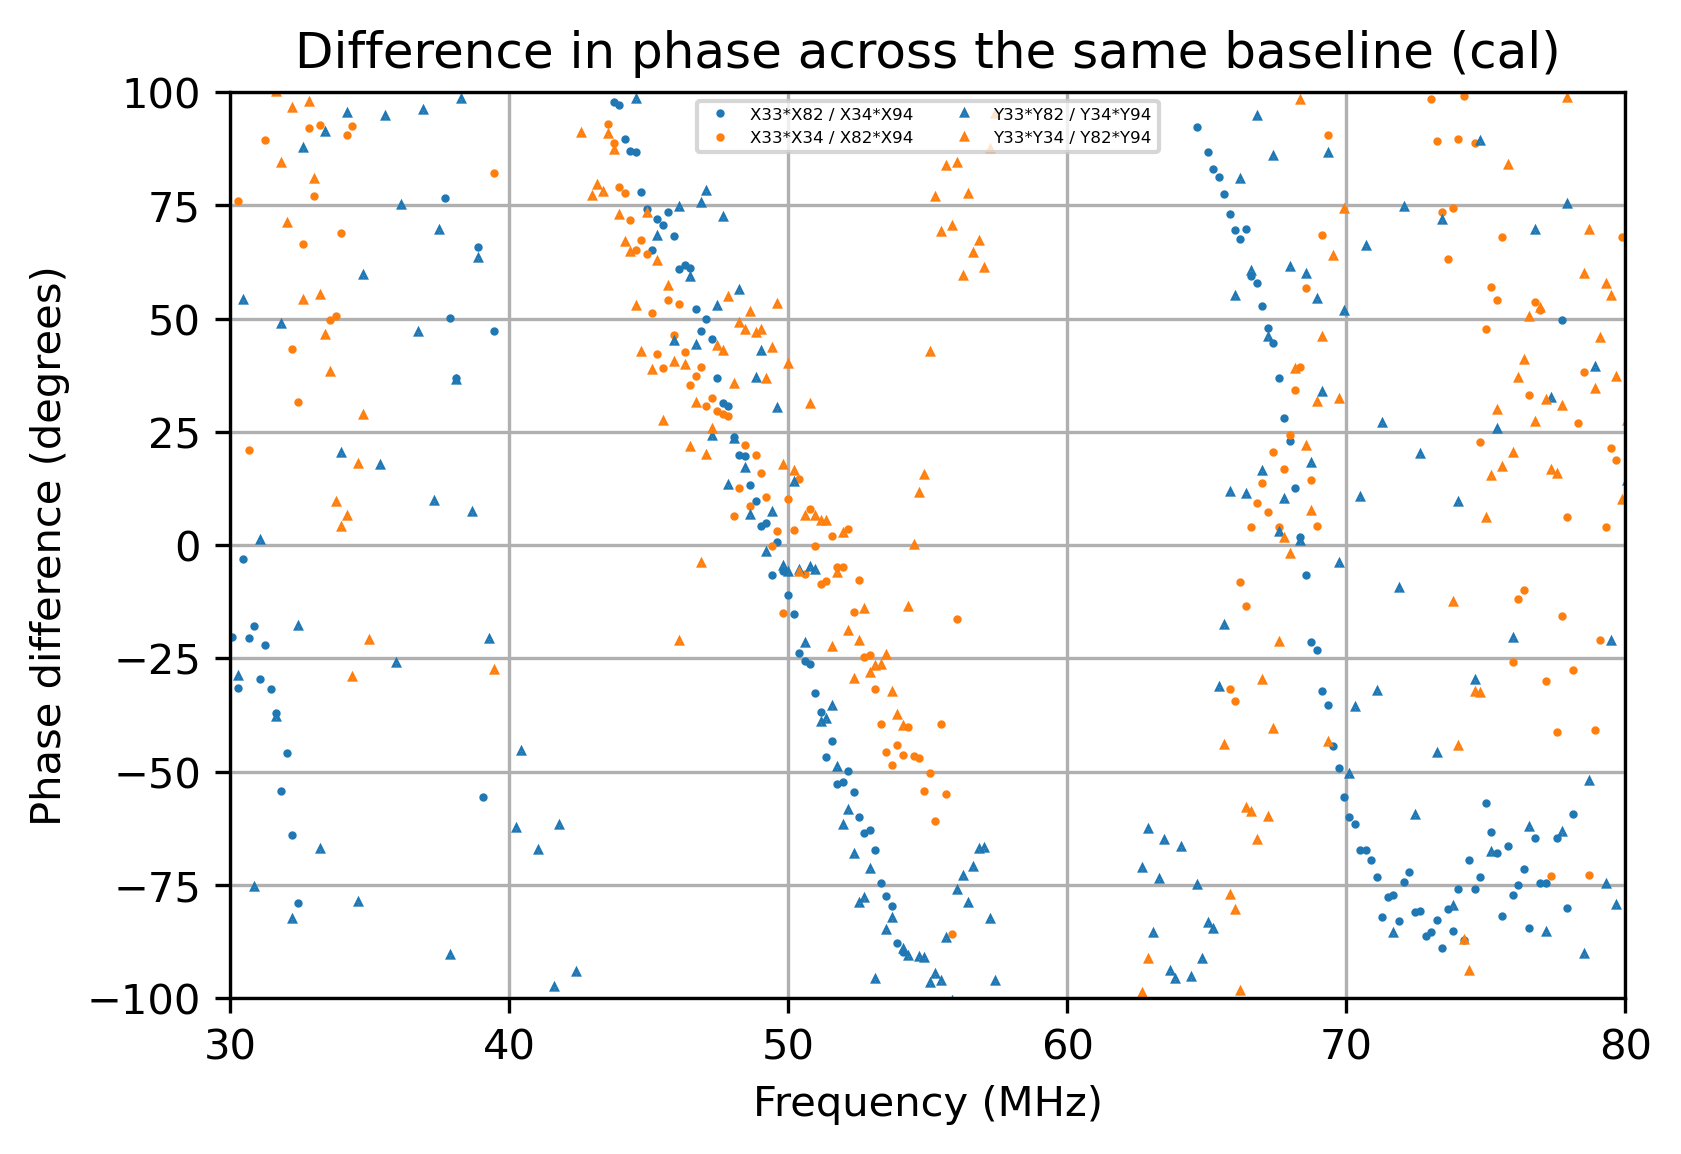

In [15]:
freq=np.arange(512)/512*100
corrX=np.exp(2j*np.pi*freq[np.newaxis,:]*(Calibration_Delay_Samples/200-Xdelay_ns/1e3)[:,np.newaxis]+2j*np.pi*XA0_deg[:,np.newaxis]/360)
corrY=np.exp(2j*np.pi*freq[np.newaxis,:]*(Calibration_Delay_Samples/200-Ydelay_ns/1e3)[:,np.newaxis]+2j*np.pi*YA0_deg[:,np.newaxis]/360)
print(corrX.shape)
plt.figure(dpi=300)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2,p1*2]/(corrX[p1]/corrX[p2])
    corr2=D1b[:,p4*2,p3*2]/(corrX[p3]/corrX[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'.',label='X%i*X%i / X%i*X%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=2)
plt.gca().set_prop_cycle(None)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2+1,p1*2+1]/(corrY[p1]/corrY[p2])
    corr2=D1b[:,p4*2+1,p3*2+1]/(corrY[p3]/corrY[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'^',label='Y%i*Y%i / Y%i*Y%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=1)

plt.legend(fontsize=4,ncol=2)
plt.ylim(-100,100)
plt.xlim(30,80)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase difference (degrees)")
plt.title('Difference in phase across the same baseline (cal)')
plt.grid()